In [1]:
# Auto Reload
%load_ext autoreload
%autoreload 2

In [2]:
# Import Modules
import csv
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import json
from pprint import pprint
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from math import log
import re
import os
from gensim import corpora
from gensim.models.doc2vec import TaggedDocument
from gensim.models.doc2vec import Doc2Vec
from wordcloud import WordCloud

# NLTK Modules
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')
from nltk import sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import chunk
from nltk.util import ngrams

# Import Custom Modules
from src.data_cleaner import *
from src.dummy_words import *

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wesle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wesle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wesle\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\wesle\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [3]:
# Import Data
clean_df = pd.read_pickle('data/clean_data.pkl')
# Rid Period from clean text
clean_df['clean_text'] = clean_df['clean_text'].apply(lambda x: "".join(x.split(".")))
# clean_df['clean_text'][0]

In [4]:
# See Current Features
# clean_df.columns
clean_df.head(2)

,song,artist,featured,rank,year,lyrics,lyrics_state,song_id,lyrics_owner_id,primary_artist_url,clean_text,sentences,tokens,tokens_stop,token_set
0,See You Again,Wiz Khalifa,NaN,1,2015,"[its been a long day without you my friend, an...",True,720401,341761,https://genius.com/artists/Wiz-khalifa,its been a long day without you my friend and ...,[its been a long day without you my friend and...,"[its, been, a, long, day, without, you, my, fr...","[long, day, without, friend, tell, see, weve, ...","[about, day, bigger, me, uh, how, came, place,..."
1,Trap Queen,Fetty Wap,NaN,2,2015,"[rgf productions, remy boyz yahah, 1738 ayy, ,...",True,496445,104344,https://genius.com/artists/Fetty-wap,rgf productions remy boyz yahah 1738 ayy im li...,[rgf productions remy boyz yahah 1738 ayy im l...,"[rgf, productions, remy, boyz, yahah, 1738, ay...","[rgf, productions, remy, boyz, yahah, 1738, ay...","[hundred, stamp, fasho, me, sack, remixin, how..."


# Text Mining Algorithms

### Vectorizing: Term Frequency-Inverse Document Frequency (TF-IDF)

> #### Getting TERM FREQUENCY
The number of times a term occurs in a specific document: 

$tf(term,document) = \frac{\# \ of \ times \ a \ term \ appears \ in \ a \ document}{\#\ of\ terms\ in\ the\ document|}$

In [5]:
# Add Features to DataFrame of Term Occurences
clean_df['term_occurences'] = clean_df['tokens'].apply(lambda x: Counter(x))
# clean_df['term_occurences'][0]

Deciding to use the tokens where the stop-words were NOT filtered out

In [6]:
# Add Features to DataFrame of Term Frequency
clean_df['term_frequency'] = [{k: (v / float(len(clean_df['tokens'].iloc[i])))
                       for k, v in clean_df['term_occurences'].iloc[i].items()} for i in range(len(clean_df['term_occurences']))]
# clean_df['term_frequency'][0]

> #### Getting DOCUMENT FREQUENCY

$df(term,corpus) = \frac{ \# \ of \ documents \ that \ contain \ a \ term}{ \# \ of \ documents \ in \ the \ corpus}$


In [7]:
# Add Features to DataFrame of Doc Occurences
doc_occ = Counter([word for bow in clean_df['tokens'] for word in set(bow)])
# doc_occ

In [8]:
# Add Features to DataFrame of Term Frequency
doc_freq =  {k: (v / float(len(clean_df['tokens'])))
            for k, v in doc_occ.items()}
# doc_freq

> #### TFIDF vector

$df(term,corpus) = \frac{ \# \ of \ documents \ that \ contain \ a \ term}{ \# \ of \ documents \ in \ the \ corpus}$

The inverse document frequency is defined in terms of the document frequency as

$idf(term,corpus) = \log{\frac{1}{df(term,corpus)}}$.

TF-IDF is an acronym for the product of two parts: the term frequency tf and what is called the inverse document frequency idf. The term frequency is just the counts in a term frequency vector. 

tf-idf $ = tf(term,document) * idf(term,corpus)$

In [9]:
tf_vectorizer = TfidfVectorizer()
vec = tf_vectorizer.fit_transform(clean_df['clean_text'])
vector_df_tf = pd.DataFrame(vec.toarray().transpose(),
                         index=tf_vectorizer.get_feature_names())
vector_df_tf

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoowap,0.0,0.036632,0.0,0.075766,0.0,0.0,0.0,0.151746,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zoua,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zucker,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zuehlsdofrff,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Testing Count Vectorizer

In [10]:
count_vec = CountVectorizer()
vec = count_vec.fit_transform(clean_df['clean_text'])
vector_df_cnt = pd.DataFrame(vec.toarray().transpose(),
                         index=count_vec.get_feature_names())
vector_df_cnt

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
00000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoowap,0,1,0,2,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
zoua,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zucker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zuehlsdofrff,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TOPIC MODELING

In [11]:
# Create Corpus
corpus = clean_df['clean_text'].tolist()
tokens = [word_tokenize(doc) for doc in corpus]
tokens_stop = clean_df['tokens_stop'].tolist() 


In [12]:
# Create Yearly Corpus
grouped = clean_df.groupby('year')

group_2019 = clean_df.iloc[grouped.groups[2019]].copy()
group_2018 = clean_df.iloc[grouped.groups[2018]].copy()
group_2017 = clean_df.iloc[grouped.groups[2017]].copy()
group_2016 = clean_df.iloc[grouped.groups[2016]].copy()
group_2015 = clean_df.iloc[grouped.groups[2015]].copy()
group_list = [group_2015, group_2016, group_2017, group_2018, group_2019]

In [13]:
corpus[0][:100], tokens[0][:5], tokens_stop[0][:5]

('its been a long day without you my friend and ill tell you all about it when i see you again weve co',
 ['its', 'been', 'a', 'long', 'day'],
 ['long', 'day', 'without', 'friend', 'tell'])

## Looking at words by Year

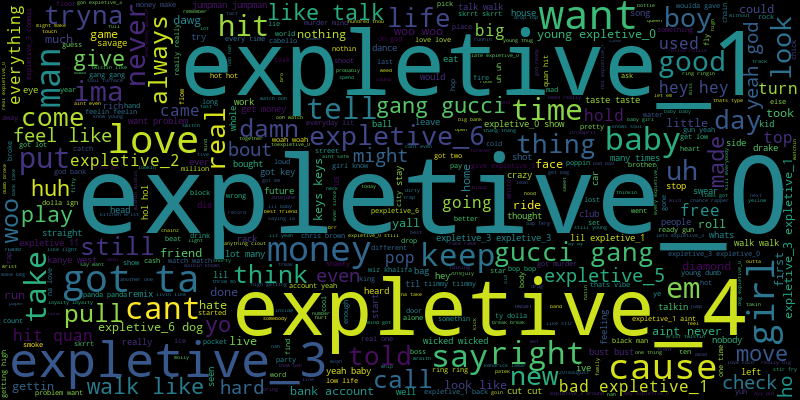

In [14]:
stops = ['im', 'thats', 'ya', 'though', 'yeah']
custom_stop = ['yeah', 'like', 'got', '2018', 'know', 'get', 'aint', 'ayy', 'go', 'na', 'back', 'one', 'gon', 'make', 'wan', 'thats', 'need', 'oh', 'see', 'feat', 'ooh', 'said', 'way', "2017", "la", 'lets', 'ft', 'let'] + stops
# Join the different processed titles together
long_string = ','.join([",".join(tokens) for tokens in tokens_stop])

# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=500, contour_width=3,  width=800, height=400, stopwords=custom_stop)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Plot Most Common Words from CounterVectorizer

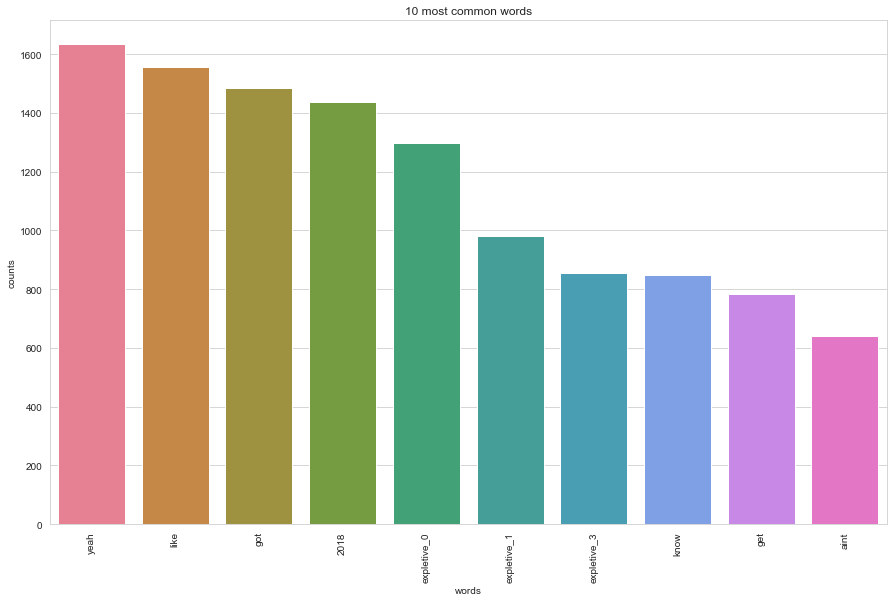

In [15]:
count_vec = CountVectorizer()
vec = count_vec.fit_transform([" ".join(set_) for set_ in clean_df['tokens_stop']])
vector_df_cnt = pd.DataFrame(vec.toarray().transpose(),
                         index=count_vec.get_feature_names())

# Visualise the 10 most common words
plot_10_most_common_words(vec, count_vec)

### Plot again after removing custom stop words (yeah, like, got, 2018, know, get, aint)

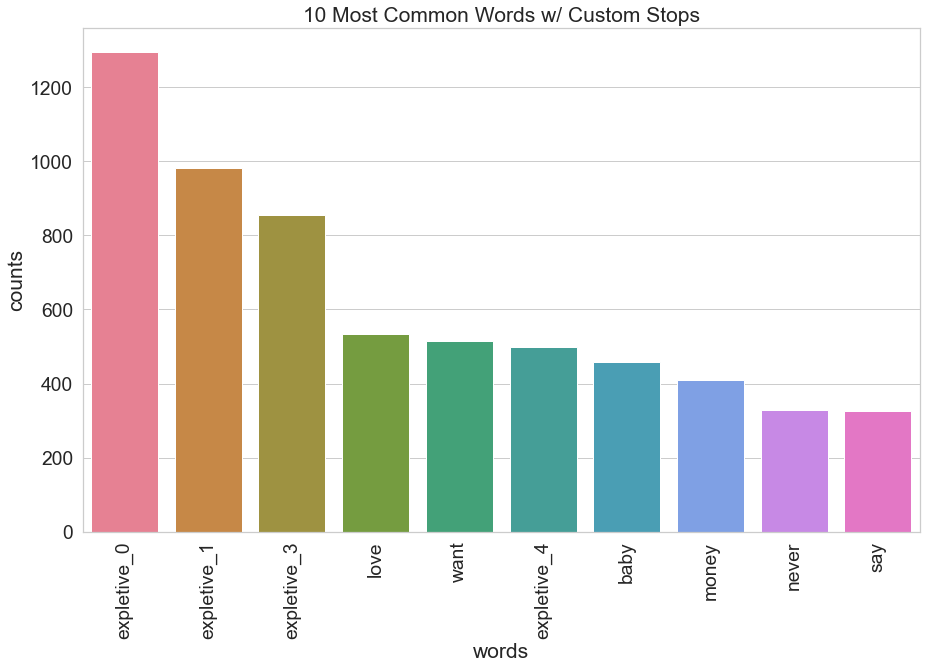

In [16]:
count_vec = CountVectorizer()
vec = count_vec.fit_transform([" ".join([x for x in set_ if x not in custom_stop]) for set_ in clean_df['tokens_stop']])
vector_df_cnt = pd.DataFrame(vec.toarray().transpose(),
                         index=count_vec.get_feature_names())

# Visualise the 10 most common words
plot_10_most_common_words(vec, count_vec, '10 Most Common Words w/ Custom Stops')

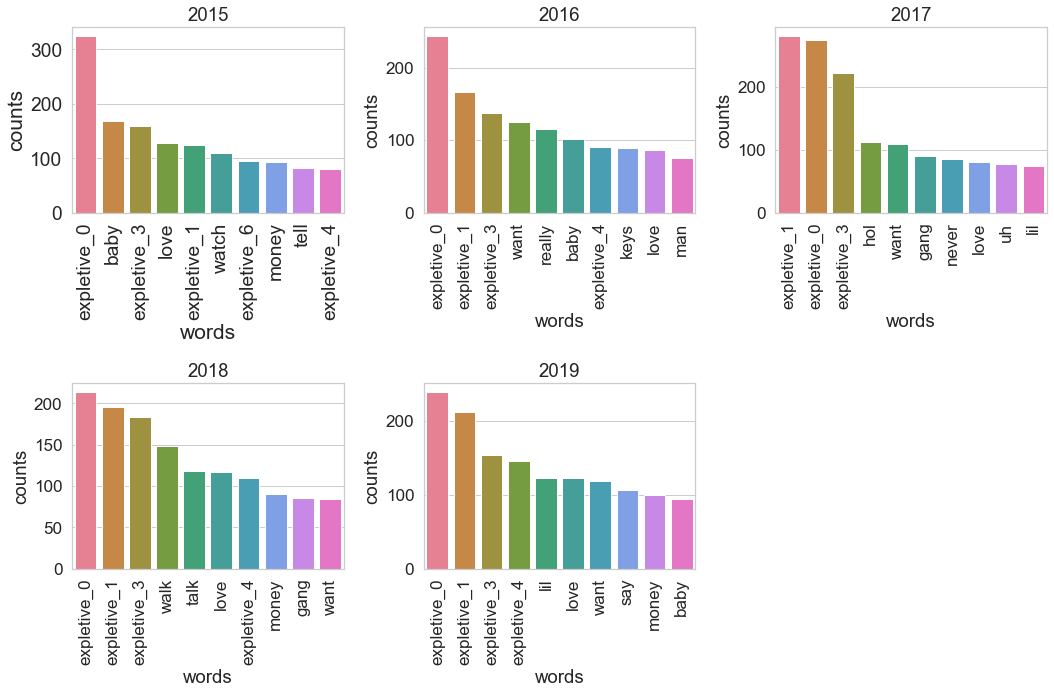

In [17]:
fig = plt.figure(figsize=(15, 10))

for year, group, i in zip([2015, 2016, 2017, 2018, 2019], group_list, range(1,6)):
    count_vec = CountVectorizer()
    vec = count_vec.fit_transform([" ".join([x for x in set_ if x not in custom_stop]) for set_ in group['tokens_stop']])
    vector_df_cnt = pd.DataFrame(vec.toarray().transpose(),
                             index=count_vec.get_feature_names())
    words = count_vec.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in vec:
        total_counts+=t.toarray()[0]

    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    fig.add_subplot(2, 3, i)
    sns.set_context("notebook", font_scale=1.55, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.title(year)
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')

fig.tight_layout()

## LDA Latent Dirichlet Allocation

## NMF Non Negative Matrix Factorization